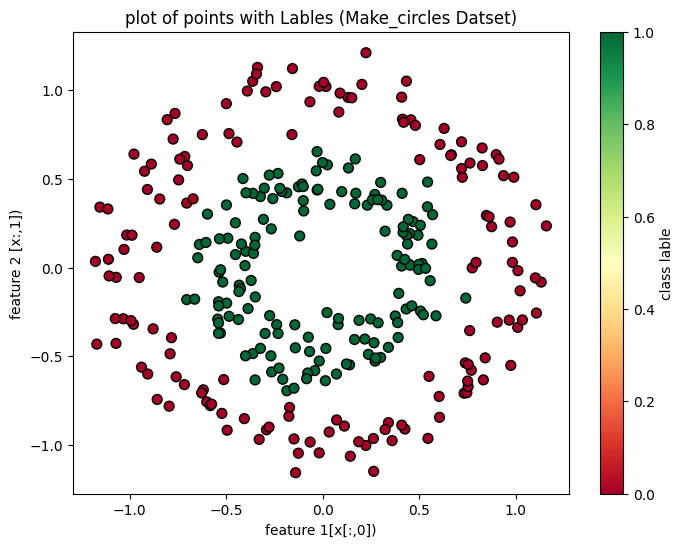

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
#generate synathetic data(circles)
X,y =make_circles(n_samples=300,noise =0.1,factor=0.5,random_state=0)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn,edgecolors ='k',marker ='o',s=50)
plt.xlabel('feature 1[x[:,0])')
plt.ylabel('feature 2 [x:,1])')
plt.title('plot of points with Lables (Make_circles Datset)')
plt.colorbar(label="class lable")
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

# Generate synthetic data
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

# Function to update and display the plot
def update_plot(hidden_layer_size): 
    # Create a multilayer perceptron (MLP) classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                        activation='relu', max_iter=3000, random_state=1)
    
    # Fit the classifier to the data
    clf.fit(X, y)
    
    # Create a grid of points for visualization
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
    x_plane, y_plane = np.meshgrid(x_vals, y_vals)
    grid_points = np.column_stack((x_plane.ravel(), y_plane.ravel()))
    
    # Predict for the grid to get decision boundary
    z = clf.predict(grid_points)
    z = z.reshape(x_plane.shape)
    
    # Clear previous plot
    plt.clf()
    
    # Plot decision boundary
    plt.contourf(x_plane, y_plane, z, levels=[-0.5, 0.5, 1.5], 
                 cmap=plt.cm.RdYlGn, alpha=0.6)
    
    # Plot original data
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', edgecolors='k',
                marker='o', s=50, label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', edgecolors='k',
                marker='o', s=50, label='Class 1')
    
    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'MLP Decision Boundary (Hidden Layer Size = {hidden_layer_size})')
    plt.legend()
    plt.show()

# Create slider widget (outside the function!)
hidden_layer_size_slider = widgets.IntSlider(value=2, min=1, max=10, step=1,
                                             description='Hidden Layer Size')

# Create interactive plot
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

# Display the interactive widget
display(interactive_plot)


interactive(children=(IntSlider(value=2, description='Hidden Layer Size', max=10, min=1), Output()), _dom_clas…

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Output

# Generate data
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

# Output widget to control plot area
out = widgets.Output()

def update_plot(hidden_layer_size):
    with out:
        out.clear_output(wait=True)
        
        # Train MLP
        clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                            activation='relu', max_iter=3000, random_state=1)
        clf.fit(X, y)

        # Grid for decision boundary
        x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
        y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
        x_plane, y_plane = np.meshgrid(x_vals, y_vals)
        grid_points = np.column_stack((x_plane.ravel(), y_plane.ravel()))

        # Predictions
        z = clf.predict(grid_points).reshape(x_plane.shape)

        # Plot
        plt.figure(figsize=(7, 5))
        plt.contourf(x_plane, y_plane, z, levels=[-0.5, 0.5, 1.5],
                     cmap=plt.cm.RdYlGn, alpha=0.6)
        plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', edgecolors='k', s=40, label='Class 0')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', edgecolors='k', s=40, label='Class 1')
        plt.title(f'MLP Decision Boundary (Hidden Layer Size = {hidden_layer_size})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Create slider
hidden_layer_size_slider = widgets.IntSlider(
    value=2, min=1, max=10, step=1, description='Hidden Layer Size'
)

# Connect slider to function
interactive_plot = widgets.interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

# Display
display(hidden_layer_size_slider, out)

# Initial call
update_plot(hidden_layer_size_slider.value)


IntSlider(value=2, description='Hidden Layer Size', max=10, min=1)

Output()